In [ ]:
# Code to create a table of canopy gap sizes in the Ivindo training data

In [1]:
import pandas as pd
import geopandas as gpd
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
os.chdir('/exports/csce/datastore/geos/users/s1332488/chapter2_data/')
df = gpd.read_file('uav_canopy_gaps_over100m2.shp')

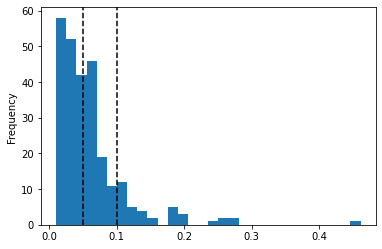

N small:  138
N medium:  90
N big:  37
------------
area small:  3.8973834801281075  ha
area medium:  6.134633436754414  ha
area big:  6.064290709662516  ha


In [5]:
A,B = 500,1000 # Cutoffs in m2 for small/medium/large canopy gaps
fig, ax = plt.subplots()
ax.axvline(x=A/10000,ls='--',color='black')
ax.axvline(x=B/10000,ls='--',color='black')
(df.area/10000).plot.hist(bins=30,ax=ax)
plt.show()


big = df[df.area>B]
medium = df[(df.area>A) & (df.area<=B)]
small = df[df.area<=A]

print('N small: ',small.shape[0])
print('N medium: ',medium.shape[0])
print('N big: ',big.shape[0])
print('------------')
print('area small: ',small.area.sum()/10000,' ha')
print('area medium: ',medium.area.sum()/10000,' ha')
print('area big: ',big.area.sum()/10000,' ha')

In [7]:
(small.area.sum())/df.area.sum()

0.24212903794785726

In [50]:
data= pd.read_csv('uav_vs_shadow_1ha.csv')
data.head()

,b1,shadow
0,0.145,0.100
1,0.007,0.034
2,0.089,0.008
3,0.075,0.208
4,0.106,0.087


(310, 4)


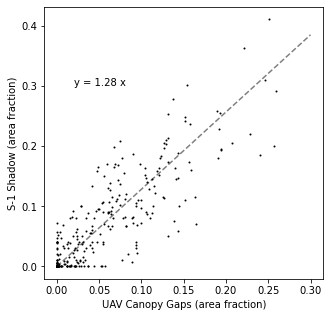

In [168]:
plt.figure(figsize=(5,5))
ax = plt.axes()
data.plot.scatter(x='b1',y='shadow',ax=ax,s=1,color='black')
#data.groupby(pd.cut(data.b1,12)).mean().plot.scatter(x='b1',y='shadow',ax=ax,color='red')
linear = np.polyfit(data.b1,data.shadow,1)
def fn(x,a):
    return a*x
def quad(x,a,b):
    return a*x**2 + b*x
# slope = curve_fit(fn,data.b1,data.shadow)[0][0]
slope = data.shadow.sum() / data.b1.sum()
## ------ My conclusion is that the simplest estimator possible is best
## To estimate canopy cover loss from S1, I just divide by a factor
## The advantage over a linear fit is that it is unbiased,
## -> using linear fit means the total disturbance area in the aoi is biased, unless negative 
## -> values are allowed, which is unphysical
params = curve_fit(quad,data.b1,data.shadow)[0]
plt.plot(xx,fn(xx,slope) ,color='black',ls='--',alpha=0.5)
data['pred'] = (data.shadow)/slope
print(data.shape)
plt.xlabel('UAV Canopy Gaps (area fraction)')
plt.ylabel('S-1 Shadow (area fraction)')
plt.text(0.02,0.3,'y = '+str(round(slope,2))+' x')
plt.savefig('/home/s1332488/chapter2/s1_vs_uav_1ha.png',dpi=300)

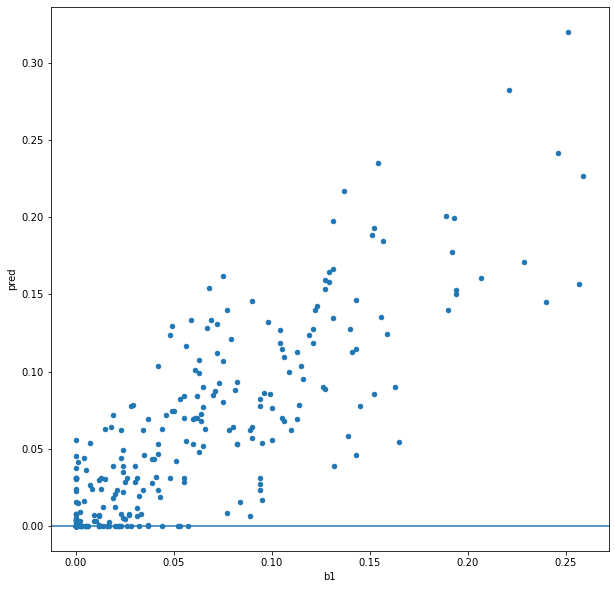

In [148]:
data.plot.scatter(x='b1',y='pred',figsize=(10,10))
plt.axhline(y=0)

<AxesSubplot:xlabel='b1', ylabel='resid'>

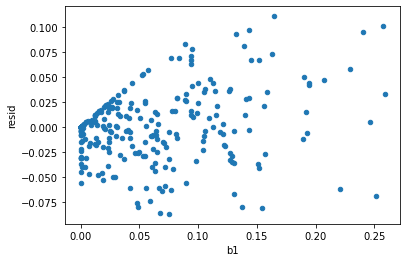

In [149]:
data['resid'] = data.b1 - data.pred
data.plot.scatter(x='b1',y='resid')

In [150]:
data.sum()

b1        1.593000e+01
shadow    2.045900e+01
pred      1.593000e+01
resid     4.024558e-15
dtype: float64